In [1]:
import sys
sys.path.append("..")
from SINC_functions import *
import matplotlib.pyplot as plt

In [2]:
x = np.genfromtxt("x.csv")
m = np.genfromtxt("m.csv")
Omega_true = np.genfromtxt("prec_true.csv")
B_true = np.genfromtxt("B_true.csv")
adj_true = np.genfromtxt("adj_true.csv")

In [3]:
v0 = 0.01
v1 = 10
lamb = 150
vB = 1
max_iters = 10
tol_prec = 0.01
tol_B = 0.01
cpus = 1
omega, EZ, phi,B,iters_total  = SINC(x, m, v0, v1, lamb, vB, max_iters, tol_prec, tol_B, cpus)

('Finished Iteration 1: ', 'change in Omega,B,Z', 0.2859207130898624, 1.0608001637657374, 2.5469365517336024)
('Finished Iteration 2: ', 'change in Omega,B,Z', 0.4034425859320445, 0.12236968268034043, 1.0697022924285613)
('Finished Iteration 3: ', 'change in Omega,B,Z', 0.17895251813782265, 0.10583791317714308, 0.7540439579900617)
('Finished Iteration 4: ', 'change in Omega,B,Z', 0.060047551082900386, 0.12502027734150112, 0.3891473745184657)
('Finished Iteration 5: ', 'change in Omega,B,Z', 0.03897985206302422, 0.06460714564268666, 0.5518037875106176)
('Finished Iteration 6: ', 'change in Omega,B,Z', 0.038793713480368155, 0.0949067667102998, 0.13985738487945)
('Finished Iteration 7: ', 'change in Omega,B,Z', 0.02595401963285047, 0.02034710949377294, 0.08997574436801559)
('Finished Iteration 8: ', 'change in Omega,B,Z', 0.03880194295873496, 0.010508024336597532, 0.08905113759590338)
('Finished Iteration 9: ', 'change in Omega,B,Z', 0.00723798823980859, 0.005557766173931333, 0.0628112092

# Check Model Performance

#### plot estimated B coefficients against true coefficients

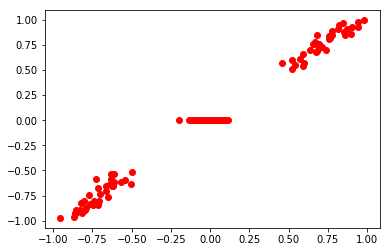

In [9]:
plt.plot(B.flatten(),B_true.flatten(),'ro')
plt.show()

#### plot estimated B coefficients against true coefficients accounting for which covariates are selected

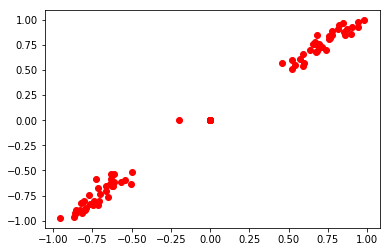

In [10]:
B_threshold = B.flatten() * (phi.flatten() > 0.50)
plt.plot(B_threshold,B_true.flatten(),'ro')
plt.show()

#### find the TPR, FPR, MCC, and F1 for B estimates

In [6]:
B_edges_true = (B_true != 0)*1
B_edges_est = (phi > 0.50) *1
TPR,FPR,MCC,F1 = np.round(Performance_B(B_edges_true,B_edges_est),4)
print("TPR:",TPR,"FPR:",FPR,"MCC:",MCC,"F1:",F1,)

('TPR:', 0.9867, 'FPR:', 0.0033, 'MCC:', 0.9917, 'F1:', 0.9933)


#### Plot estimated precision matrix values against true precision matrix values

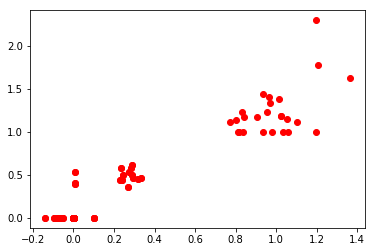

In [7]:
plt.plot(omega.flatten(),Omega_true.flatten(),'ro')
plt.show()

#### find the TPR, FPR, MCC, and F1 for Omega estimates

In [13]:
TPR,FPR,MCC,F1 = np.round(Performance_Omega(adj_true,adj_est),4)
print("TPR:",TPR,"FPR:",FPR,"MCC:",MCC,"F1:",F1,)

('TPR:', 0.5217, 'FPR:', 0.0357, 'MCC:', 0.6247, 'F1:', 0.6316)
